# IRIS DATASET

In [21]:
import time as t

[(5.1, 3.5), (4.9, 3.0), (4.7, 3.2), (4.6, 3.1), (5.0, 3.6), (5.4, 3.9), (4.6, 3.4), (5.0, 3.4), (4.4, 2.9), (4.9, 3.1), (5.4, 3.7), (4.8, 3.4), (4.8, 3.0), (4.3, 3.0), (5.8, 4.0), (5.7, 4.4), (5.4, 3.9), (5.1, 3.5), (5.7, 3.8), (5.1, 3.8), (5.4, 3.4), (5.1, 3.7), (4.6, 3.6), (5.1, 3.3), (4.8, 3.4), (5.0, 3.0), (5.0, 3.4), (5.2, 3.5), (5.2, 3.4), (4.7, 3.2), (4.8, 3.1), (5.4, 3.4), (5.2, 4.1), (5.5, 4.2), (4.9, 3.1), (5.0, 3.2), (5.5, 3.5), (4.9, 3.6), (4.4, 3.0), (5.1, 3.4), (5.0, 3.5), (4.5, 2.3), (4.4, 3.2), (5.0, 3.5), (5.1, 3.8), (4.8, 3.0), (5.1, 3.8), (4.6, 3.2), (5.3, 3.7), (5.0, 3.3), (7.0, 3.2), (6.4, 3.2), (6.9, 3.1), (5.5, 2.3), (6.5, 2.8), (5.7, 2.8), (6.3, 3.3), (4.9, 2.4), (6.6, 2.9), (5.2, 2.7), (5.0, 2.0), (5.9, 3.0), (6.0, 2.2), (6.1, 2.9), (5.6, 2.9), (6.7, 3.1), (5.6, 3.0), (5.8, 2.7), (6.2, 2.2), (5.6, 2.5), (5.9, 3.2), (6.1, 2.8), (6.3, 2.5), (6.1, 2.8), (6.4, 2.9), (6.6, 3.0), (6.8, 2.8), (6.7, 3.0), (6.0, 2.9), (5.7, 2.6), (5.5, 2.4), (5.5, 2.4), (5.8, 2.7), (6.

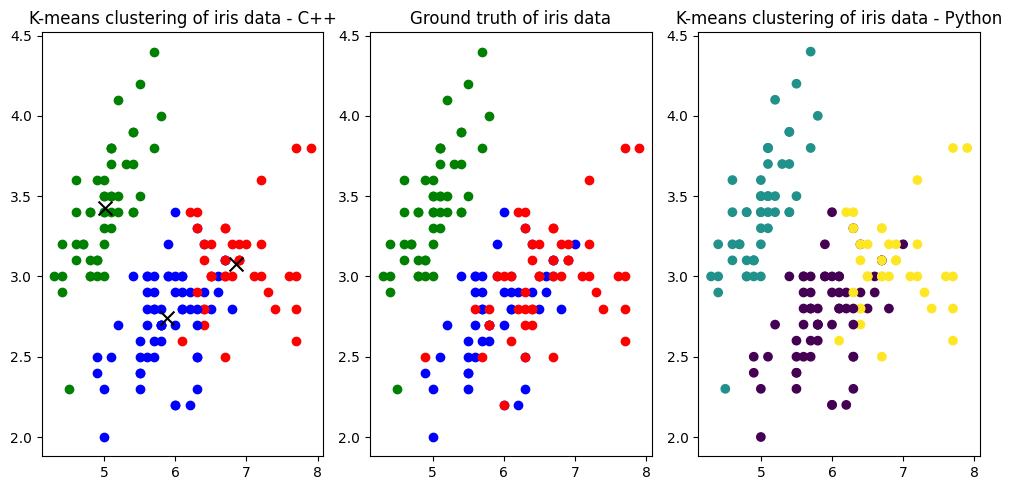

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

iris_classes = np.loadtxt('./output/kmeans_assignment_iris.txt')
iris_ground_truth = [0]*50 + [1]*50 + [2]*50
iris_data = [5.1,3.5,1.4,0.2,
4.9,3.0,1.4,0.2,
4.7,3.2,1.3,0.2,
4.6,3.1,1.5,0.2,
5.0,3.6,1.4,0.2,
5.4,3.9,1.7,0.4,
4.6,3.4,1.4,0.3,
5.0,3.4,1.5,0.2,
4.4,2.9,1.4,0.2,
4.9,3.1,1.5,0.1,
5.4,3.7,1.5,0.2,
4.8,3.4,1.6,0.2,
4.8,3.0,1.4,0.1,
4.3,3.0,1.1,0.1,
5.8,4.0,1.2,0.2,
5.7,4.4,1.5,0.4,
5.4,3.9,1.3,0.4,
5.1,3.5,1.4,0.3,
5.7,3.8,1.7,0.3,
5.1,3.8,1.5,0.3,
5.4,3.4,1.7,0.2,
5.1,3.7,1.5,0.4,
4.6,3.6,1.0,0.2,
5.1,3.3,1.7,0.5,
4.8,3.4,1.9,0.2,
5.0,3.0,1.6,0.2,
5.0,3.4,1.6,0.4,
5.2,3.5,1.5,0.2,
5.2,3.4,1.4,0.2,
4.7,3.2,1.6,0.2,
4.8,3.1,1.6,0.2,
5.4,3.4,1.5,0.4,
5.2,4.1,1.5,0.1,
5.5,4.2,1.4,0.2,
4.9,3.1,1.5,0.2,
5.0,3.2,1.2,0.2,
5.5,3.5,1.3,0.2,
4.9,3.6,1.4,0.1,
4.4,3.0,1.3,0.2,
5.1,3.4,1.5,0.2,
5.0,3.5,1.3,0.3,
4.5,2.3,1.3,0.3,
4.4,3.2,1.3,0.2,
5.0,3.5,1.6,0.6,
5.1,3.8,1.9,0.4,
4.8,3.0,1.4,0.3,
5.1,3.8,1.6,0.2,
4.6,3.2,1.4,0.2,
5.3,3.7,1.5,0.2,
5.0,3.3,1.4,0.2,
7.0,3.2,4.7,1.4,
6.4,3.2,4.5,1.5,
6.9,3.1,4.9,1.5,
5.5,2.3,4.0,1.3,
6.5,2.8,4.6,1.5,
5.7,2.8,4.5,1.3,
6.3,3.3,4.7,1.6,
4.9,2.4,3.3,1.0,
6.6,2.9,4.6,1.3,
5.2,2.7,3.9,1.4,
5.0,2.0,3.5,1.0,
5.9,3.0,4.2,1.5,
6.0,2.2,4.0,1.0,
6.1,2.9,4.7,1.4,
5.6,2.9,3.6,1.3,
6.7,3.1,4.4,1.4,
5.6,3.0,4.5,1.5,
5.8,2.7,4.1,1.0,
6.2,2.2,4.5,1.5,
5.6,2.5,3.9,1.1,
5.9,3.2,4.8,1.8,
6.1,2.8,4.0,1.3,
6.3,2.5,4.9,1.5,
6.1,2.8,4.7,1.2,
6.4,2.9,4.3,1.3,
6.6,3.0,4.4,1.4,
6.8,2.8,4.8,1.4,
6.7,3.0,5.0,1.7,
6.0,2.9,4.5,1.5,
5.7,2.6,3.5,1.0,
5.5,2.4,3.8,1.1,
5.5,2.4,3.7,1.0,
5.8,2.7,3.9,1.2,
6.0,2.7,5.1,1.6,
5.4,3.0,4.5,1.5,
6.0,3.4,4.5,1.6,
6.7,3.1,4.7,1.5,
6.3,2.3,4.4,1.3,
5.6,3.0,4.1,1.3,
5.5,2.5,4.0,1.3,
5.5,2.6,4.4,1.2,
6.1,3.0,4.6,1.4,
5.8,2.6,4.0,1.2,
5.0,2.3,3.3,1.0,
5.6,2.7,4.2,1.3,
5.7,3.0,4.2,1.2,
5.7,2.9,4.2,1.3,
6.2,2.9,4.3,1.3,
5.1,2.5,3.0,1.1,
5.7,2.8,4.1,1.3,
6.3,3.3,6.0,2.5,
5.8,2.7,5.1,1.9,
7.1,3.0,5.9,2.1,
6.3,2.9,5.6,1.8,
6.5,3.0,5.8,2.2,
7.6,3.0,6.6,2.1,
4.9,2.5,4.5,1.7,
7.3,2.9,6.3,1.8,
6.7,2.5,5.8,1.8,
7.2,3.6,6.1,2.5,
6.5,3.2,5.1,2.0,
6.4,2.7,5.3,1.9,
6.8,3.0,5.5,2.1,
5.7,2.5,5.0,2.0,
5.8,2.8,5.1,2.4,
6.4,3.2,5.3,2.3,
6.5,3.0,5.5,1.8,
7.7,3.8,6.7,2.2,
7.7,2.6,6.9,2.3,
6.0,2.2,5.0,1.5,
6.9,3.2,5.7,2.3,
5.6,2.8,4.9,2.0,
7.7,2.8,6.7,2.0,
6.3,2.7,4.9,1.8,
6.7,3.3,5.7,2.1,
7.2,3.2,6.0,1.8,
6.2,2.8,4.8,1.8,
6.1,3.0,4.9,1.8,
6.4,2.8,5.6,2.1,
7.2,3.0,5.8,1.6,
7.4,2.8,6.1,1.9,
7.9,3.8,6.4,2.0,
6.4,2.8,5.6,2.2,
6.3,2.8,5.1,1.5,
6.1,2.6,5.6,1.4,
7.7,3.0,6.1,2.3,
6.3,3.4,5.6,2.4,
6.4,3.1,5.5,1.8,
6.0,3.0,4.8,1.8,
6.9,3.1,5.4,2.1,
6.7,3.1,5.6,2.4,
6.9,3.1,5.1,2.3,
5.8,2.7,5.1,1.9,
6.8,3.2,5.9,2.3,
6.7,3.3,5.7,2.5,
6.7,3.0,5.2,2.3,
6.3,2.5,5.0,1.9,
6.5,3.0,5.2,2.0,
6.2,3.4,5.4,2.3,
5.9,3.0,5.1,1.8]


iris2 = []
for i in range(0, len(iris_data), 4):
    iris2.append((iris_data[i], iris_data[i+1]))

print(iris2)

iris2 = np.array(iris2)

print(iris2.shape)

plt.figure(figsize=(10, 5))
plt.subplot(131)
# plot the data  points in the color of the classes, index is the same
for i in range(len(iris2)):
    if iris_classes[i] == 0:
        plt.scatter(iris2[i][0], iris2[i][1], color='red')
    elif iris_classes[i] == 1:
        plt.scatter(iris2[i][0], iris2[i][1], color='blue')
    else:
        plt.scatter(iris2[i][0], iris2[i][1], color='green')


# Centroid 0: 6.85385 3.07692 5.71538 2.05385 
# Centroid 1: 5.88361 2.74098 4.38852 1.43443 
# Centroid 2: 5.006 3.428 1.462 0.246 
plt.scatter(6.85385, 3.07692, color='black', marker='x', s=100)
plt.scatter(5.88361, 2.74098, color='black', marker='x', s=100)
plt.scatter(5.006, 3.428, color='black', marker='x', s=100)

plt.title('K-means clustering of iris data - C++')



plt.subplot(132)
# plot the ground truth
for i in range(len(iris2)):
    if iris_ground_truth[i] == 0:
        plt.scatter(iris2[i][0], iris2[i][1], color='green')
    elif iris_ground_truth[i] == 1:
        plt.scatter(iris2[i][0], iris2[i][1], color='blue')
    else:
        plt.scatter(iris2[i][0], iris2[i][1], color='red')
plt.title('Ground truth of iris data')




df2 = pd.read_csv('./dataset/iris.data', header = None, sep = ',')
dataIris = df2.iloc[0:150, 0:4].values
Iris_True = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
t0 = t.time()
kmeans_Iris = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(dataIris)
plt.subplot(133)
x = df2.iloc[0:150, 0].values
y = df2.iloc[0:150, 1].values
plt.scatter(x, y, c = kmeans_Iris.labels_)
print("Time taken: ", t.time() - t0)   
plt.tight_layout()
plt.title('K-means clustering of iris data - Python')

plt.show()


Calculate the index

In [11]:
rand_cpp = metrics.rand_score(iris_ground_truth, iris_classes)
rand_python = metrics.rand_score(Iris_True, kmeans_Iris.labels_)
print("Rand CPP:", rand_cpp)
print("Rand python: ", rand_python)

Rand CPP: 0.8737360178970918
Rand python:  0.8797315436241611


## SOM for Iris

/home/r4ph/.local/lib/python3.10/site-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 400 / 400 ] 100% - 0:00:00 left 
 quantization error: 0.6694074690320472
Time taken for SOM python:  0.14176440238952637


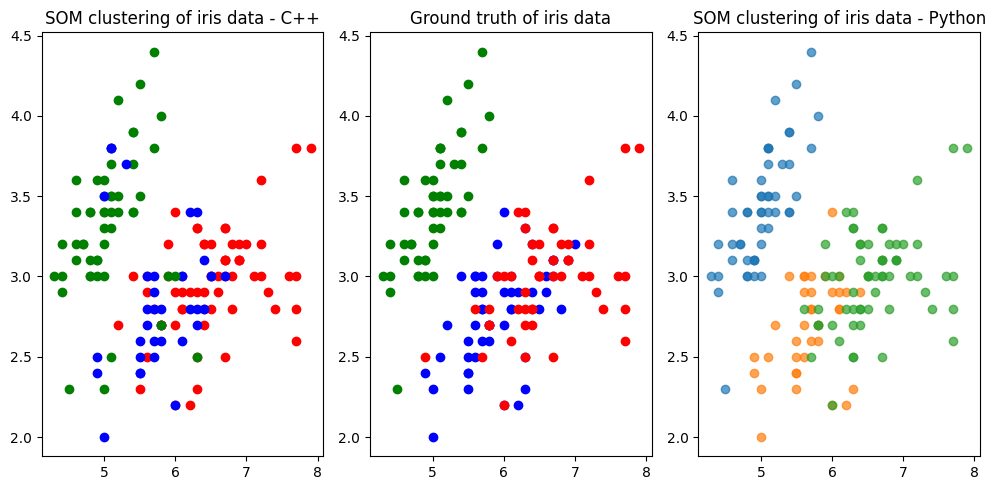

In [22]:
iris_som_cpp = np.loadtxt('./output/som_assignment_iris.txt')

iris_ground_truth = [0]*50 + [1]*50 + [2]*50


# SOM in python
from minisom import MiniSom

df2 = pd.read_csv('./dataset/iris.data', header = None, sep = ',')
dataIris = df2.iloc[0:150, 0:4].values

t0 = t.time()
som_Iris = MiniSom(1, 3, 4, sigma = 1, learning_rate = 0.1)
som_Iris.train_batch(dataIris, 400, verbose = True)
x = df2.iloc[0:150, 0].values
y = df2.iloc[0:150, 1].values
winner_coordinates = np.array([som_Iris.winner(x) for x in dataIris]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (2, 4))
print("Time taken for SOM python: ", t.time() - t0)

plt.figure(figsize=(10, 5))
plt.subplot(131)
# plot the data  points in the color of the classes, index is the same
for i in range(len(iris2)):
    if iris_som_cpp[i] == 0:
        plt.scatter(iris2[i][0], iris2[i][1], color='red')
    elif iris_som_cpp[i] == 1:
        plt.scatter(iris2[i][0], iris2[i][1], color='blue')
    else:
        plt.scatter(iris2[i][0], iris2[i][1], color='green')

plt.title('SOM clustering of iris data - C++')

plt.subplot(132)
# plot the ground truth
for i in range(len(iris2)):
    if iris_ground_truth[i] == 0:
        plt.scatter(iris2[i][0], iris2[i][1], color='green')
    elif iris_ground_truth[i] == 1:
        plt.scatter(iris2[i][0], iris2[i][1], color='blue')
    else:
        plt.scatter(iris2[i][0], iris2[i][1], color='red')

plt.title('Ground truth of iris data')

plt.subplot(133)
for c in np.unique(cluster_index):
    plt.scatter(dataIris[cluster_index == c, 0], dataIris[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
plt.tight_layout()
plt.title('SOM clustering of iris data - Python')

plt.show()

In [20]:
rand_cpp = metrics.rand_score(iris_ground_truth, iris_som_cpp)
rand_python = metrics.rand_score(Iris_True, cluster_index)
print("Rand CPP:", rand_cpp)
print("Rand python: ", rand_python)

Rand CPP: 0.7254586129753915
Rand python:  0.8859060402684564


# BME dataset

In [24]:
import utils as ut

BME_data = ut.BME_data
BME_truth = ut.BME_labels

BME_kmeans_cpp_labels = np.loadtxt('./output/kmeans_assignment_BME.txt')
BME_SOM_cpp_labels = np.loadtxt('./output/som_assignment_BME.txt')

rand_kmeans_cpp = metrics.rand_score(BME_truth, BME_kmeans_cpp_labels)
rand_som_cpp = metrics.rand_score(BME_truth, BME_SOM_cpp_labels)
print("Rand kmeans CPP:", rand_kmeans_cpp)
print("Rand SOM CPP:", rand_som_cpp)


Rand kmeans CPP: 0.6413793103448275
Rand SOM CPP: 0.632183908045977


In [35]:
# Kmeans in python on BME_data
t0 = t.time()
kmeans_BME = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(BME_data)
rand_kmeans_py = metrics.rand_score(BME_truth, kmeans_BME.labels_)
print("Time taken for Kmeans python on BME data: ", t.time() - t0)

print("Rand kmeans Python:", rand_kmeans_py)


print(BME_data.shape) # (30x128)

#transform BME_data in float
BME_data = BME_data.astype(float)

# SOM in python on BME_data
t0 = t.time()
som_BME = MiniSom(1, 3, 128, sigma = 1, learning_rate = 0.1)
som_BME.train_batch(BME_data, 400, verbose = True)
winner_coordinates = np.array([som_BME.winner(x) for x in BME_data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (1, 3))
print("Time taken for SOM python on BME data: ", t.time() - t0)
rand_som_py = metrics.rand_score(BME_truth, cluster_index)

print("Rand SOM Python:", rand_som_py)

Time taken for Kmeans python on BME data:  0.1947171688079834
Rand kmeans Python: 0.6344827586206897
(30, 128)
 [ 400 / 400 ] 100% - 0:00:00 left 
 quantization error: 2.6663230389914734
Time taken for SOM python on BME data:  0.15784120559692383
Rand SOM Python: 0.632183908045977


/home/r4ph/.local/lib/python3.10/site-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
